Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

I= inflow (m3/s),
Q= outflow(m3/s),
K= Storage time constant = 12 hour,
X= Weighing factor = 0.5,
Delta-T= 6 hour,
Time in Hour

Import Dataset

In [2]:
I= np.loadtxt('test_routing.txt', skiprows=1, delimiter=',', dtype='int')
I

array([10, 20, 50, 60, 55, 45, 35, 27, 20, 15])

Preparing Dataset and Visualizing:

In [3]:
Time=np.empty(10)
Time[0]= 0
for i in range(1,10):
  Time[i] = 6 + Time[i-1]

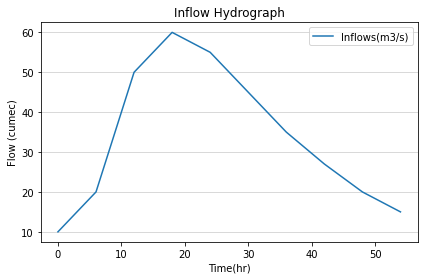

In [4]:
plt.plot(Time,I,label='Inflows(m3/s)')
plt.title("Inflow Hydrograph")
plt.xlabel('Time(hr)')
plt.ylabel('Flow (cumec)')
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
plt.legend()
plt.tight_layout()
plt.show()

Calculating C1,C2,C3:

In [5]:
K=12
X=0.5
delT=6
D = 2*K*(1-X)+ delT
# D
C1= (-(2*K*X)+ delT)/D
# C1
C2= ((2*K*X)+ delT)/D
# C2
C3= ((2*K*(1-X))- delT)/D
# C3

#check:
Z= C1+C2+C3
Z

1.0

Calculation Outflow,Q (m3/s): Outflow Equation: Qj+1 = C1IJ+1 + C2IJ + C3QJ

In [6]:
Q = np.empty(10)
Q[0] = 10
for i in range(1,10):
    Q[i] = C1*I[i] + C2*I[i-1] + C3*Q[i-1]

Q

array([10.        ,  6.66666667,  5.55555556, 31.85185185, 52.28395062,
       57.42798354, 52.47599451, 43.49199817, 34.83066606, 26.61022202])

Visualizing Inflow VS Outflow

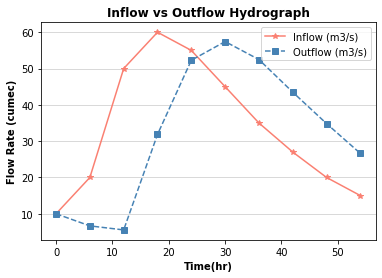

In [7]:
plt.plot(Time,I, '-*', label='Inflow (m3/s)',color='salmon')
plt.plot(Time,Q, '--s', label='Outflow (m3/s)', color='steelblue')
plt.title("Inflow vs Outflow Hydrograph",fontweight = 'semibold')
plt.xlabel('Time(hr)',fontweight = 'semibold')
plt.ylabel('Flow Rate (cumec)',fontweight = 'semibold')
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
plt.legend()
plt.savefig("Inflow vs Outflow Hydrograph.png", dpi=150, bbox_inches='tight')
plt.show()